In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
# Read data into Pandas Dataframe "df"
df = pd.read_csv('healthcare-dataset-stroke-data.csv', index_col=None)

In [3]:
#Interpolated data
df.loc[:,"bmi"] = df.loc[:,"bmi"].fillna(df.loc[:,"bmi"].median())
df.dropna(axis=0,inplace=True)

In [4]:
#Put the prediction label ‘whether stroke’ in the first column
front = df['stroke']
df.drop(labels=['stroke'], axis=1, inplace = True)
df.insert(0, 'stroke', front)

In [5]:
#A total of 5110 samples, each sample contains 12 features
df.shape

(5110, 12)

In [6]:
#Feature data type. 
df.dtypes

stroke                 int64
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [8]:
# Convert the string type to an integer
df["gender"] = df["gender"].astype('category').cat.codes
df["ever_married"] = df["ever_married"].astype('category').cat.codes
df["work_type"] = df["work_type"].astype('category').cat.codes
df["Residence_type"] = df["Residence_type"].astype('category').cat.codes
df["smoking_status"] = df["smoking_status"].astype('category').cat.codes

# Produces X, y, the eigenvalue and the target value
target_name = 'stroke'
X = df.drop('stroke', axis=1)
y = df[target_name]

# Divide the data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [9]:
import pydotplus 

from six import StringIO  
from sklearn import tree
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Instantiate a random forest
rf = RandomForestClassifier(
                            criterion='entropy',
                            n_estimators=3, 
                            max_depth=None, # Defining the depth of the tree can be used to prevent overfitting
                            min_samples_split=10, # Define at least how many samples before you bifurcate
                            #min_weight_fraction_leaf=0.02 # Define the minimum number of samples a leaf node needs to contain (using percentage expression) to prevent overfitting
                            )
# Model training
rf.fit(X_train, y_train)
# Calculation index parameter
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
#print ("Random forests AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.18      0.04      0.07        75

    accuracy                           0.94      1533
   macro avg       0.56      0.52      0.52      1533
weighted avg       0.91      0.94      0.93      1533



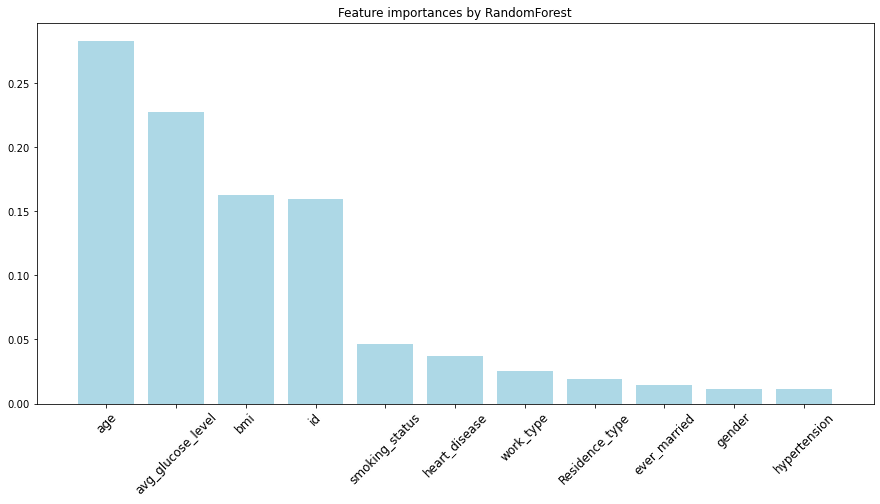

In [11]:
# The importance of a feature
importances = rf.feature_importances_
# Characteristics of the name
feat_names = df.drop(['stroke'],axis=1).columns
# The sorting
indices = np.argsort(importances)[::-1]
# drawing
plt.figure(figsize=(15,7))
plt.title("Feature importances by RandomForest")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
##plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation=45,fontsize=12)
plt.xlim([-1, len(indices)])
plt.show()

In [12]:
print(importances)
print('\n')
print(feat_names)

[0.15999529 0.01154049 0.28297602 0.01138973 0.03738316 0.01478369
 0.02544456 0.01904754 0.22801975 0.16315515 0.04626461]


Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')
